# Cómo resolver ecuaciones observando  



Marco Julio Cañas Campillo 

Magister en Ciencias Matemáticas de la Universidad Nacional sede Medellín.    
Licenciado en Matemáticas y Física Facultad de Educación de la Universidad de Antioquia.   



<img src = 'https://render.fineartamerica.com/images/rendered/square-product/small/images-medium-large/francois-viete-french-mathematician-sheila-terry.jpg'>

# FRANÇOIS VIÈTE (1540-1603)   



Tuvo una exitosa carrera política antes de dedicarse a las matemáticas en los últimos años de su vida.   



Fue uno de los más afamados matemáticos franceses del siglo XVI.  

Viète introdujo un nuevo nivel de abstracción en álgebra al usar letras para representar cantidades conocidas en una ecuación.   

Antes de la época de Viète’ se resolvía cada una de las ecuaciones.   



Por ejemplo, para cada una de las siguientes ecuaciones cuadráticas  

$$ 3x^{2} + 2x + 8 = 0 $$ 
$$ 5x^{2} + 6x + 4 = 0 $$  

se completaba el cuadrado para encontrar su solución.   



La idea de Viète fue considerar a la vez todas las ecuaciones cuadráticas al escribir  

$$ ax^{2} + bx + c = 0 $$  

donde $a$, $b$ y $c$ son cantidades conocidas. De este modo, él hizo posible escribir una fórmula (en este caso, la fórmula cuadrática) incluyendo $a$, $b$ y $c$, que pueden usarse para resolver todas esas ecuaciones de una sola vez.  



El genio matemático de Viète resultó ser sumamente valioso durante una guerra entre Francia y España.   



Para comunicarse con sus tropas, los españoles utilizaban un complicado código que Viète logró descifrar.  

Sin saber el logro de Viète el rey español Felipe II protestó ante el papa, diciendo que los franceses estaban usando brujería para leer los
mensajes de los españoles.

# Pasar de resolver una ecuación a la vez, a tener una solución para todas 



# Una deducción difícil 

\begin{align*}
ax^{2} + bx + c = 0 \quad & \to \quad  x^{2} + \frac{b}{a}x + \frac{c}{a} = 0 \\
                    \quad & \to \quad x^{2} + \frac{b}{a}x = - \frac{c}{a} \\ 
                    \quad & \to \quad x^{2} + \frac{b}{a}x + \left( \frac{b}{2a} \right)^{2} = \left( \frac{b}{2a} \right)^{2} - \frac{c}{a} \\ 
                    \quad & \to \quad \left( x + \frac{b}{2a} \right)^{2} = \frac{b^{2}}{4a^{2}} - \frac{4ac}{4a^{2}} \\
                    \quad & \to \quad  x + \frac{b}{2a} = \pm \sqrt{ \frac{b^{2}}{4a^{2}} - \frac{4ac}{4a^{2}} } \\
                    \quad & \to \quad x =   - \frac{b}{2a} \pm \sqrt{ \frac{b^{2}}{4a^{2}} - \frac{4ac}{4a^{2}} }\\
                    \quad & \to \quad x = - \frac{b}{2a} \pm \sqrt{ \frac{b^{2} - 4ac}{4a^{2}}} \\
                    \quad & \to \quad x = \frac{-b}{2a} \pm \frac{\sqrt{b^{2} - 4ac }}{2a} \\  
                    \quad & \to \quad x = \frac{-b \pm \sqrt{b^{2} - 4ac}}{2a} 
\end{align*}

# Otros Problemas son:   

* Los múlltiples tipos de ecuaciones.
* La gran variedad de métodos algebraicos. 

# Qué significa resolver una ecuación y cómo vincular métodos de observación alternativos o complementarios a los métodos algebraicos

\begin{align*}
&\text{Encontrar $x$ tal que los lados de la ecuación son iguales} \\
&\iff \text{Encontrar los $x$ donde la función diferencia de los lados sea cero} \\
&\iff \text{Encontrar los $x$ donde el gráfico de la función diferencia de los lados corta el eje horizontal}
\end{align*}


# Dos concepciones para solucionar ecuaciones en precálculo  

1. Concepción numérica
2. Concepción simbólica  

# Práctica de solución de diferentes tipos de ecuaciones

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 
from scipy.optimize import fsolve  # for root finding

class FuncionDiferenciaLadosEcuacion:
    def __init__(self, f_izq, f_der, a, b):
        """
        Inicializa la clase con la función lambda f y los extremos del dominio a y b.
        """
        self.f_izq = f_izq
        self.f_der = f_der
        self.a = a
        self.b = b
    def crear_tabla_funciones_lados(self, paso = 1):
        """
        Crea una tabla con los puntos del dominio de la función y sus valores de la 
        función derecha e izquierda correspondientes.
        El parámetro paso es opcional y por defecto es 1.
        """
        puntos_dominio = np.arange(self.a, self.b + paso, paso)  # Crea una progresión aritmética de puntos del dominio
        valores_f_izq = self.f_izq(puntos_dominio)  # Evalúa la función en esos puntos
        valores_f_der = self.f_der(puntos_dominio)
        # Crear DataFrame
        diccionario = {'numeros x': puntos_dominio, r'valores función derecha $f_izq(x)$': valores_f_izq, \
            r'valores función derecha $f_der(x)$': valores_f_der}
        return pd.DataFrame(diccionario)
        
    def crear_tabla_de_la_funcion_diferencia(self, paso=1):
        """
        Crea una tabla con los puntos del dominio de la función y sus valores correspondientes.
        El parámetro paso es opcional y por defecto es 1.
        """
        puntos_dominio = np.arange(self.a, self.b + paso, paso)  # Crea una progresión aritmética de puntos del dominio
        valores_funcion = self.f_izq(puntos_dominio) - self.f_der(puntos_dominio)  # Evalúa la función en esos puntos
        
        # Crear DataFrame
        diccionario = {'numeros x': puntos_dominio, r'valores $y$ o $f(x)$': valores_funcion}
        return pd.DataFrame(diccionario)
    
    def crear_graficos_f_izq_f_der(self, paso = 1):
        """
        Crea un gráficos de las funcines correspondientes a los lados de la ecuación.
        El parámetro `paso` es opcional y por defecto es 1.
        """
        # Configuración básica del gráfico
        plt.figure(figsize=(6, 4))
        plt.title('Gráficos de las Funcines correspondientes a los lados de la ecuación a resolver')
        plt.xlabel('Puntos x')
        plt.ylabel('Valores f_izq(x)  y de f_der(x)')
        plt.grid(alpha=0.3)
        
        # Obtener los datos de la tabla de la función con el paso opcional
        df = self.crear_tabla_funciones_lados(paso)
        
        # Graficar los las funciones correspondientes a los lados de la ecuación
        plt.plot(df.iloc[:, 0].values, df.iloc[:, 1].values, color='blue', label = r'$f_izq(x)$')  # Graficar los puntos
        plt.plot(df.iloc[:, 0].values, df.iloc[:, 2].values, color='red', label = r'$f_der(x)$')  # Graficar los puntos
        # grafica 
        solucion_numerica = fsolve(lambda x: self.f_izq(x) - self.f_der(x) , self.a)[0]
        plt.scatter([solucion_numerica], [0], color='red', \
            label = f'La solución de la ecuacion es x = {solucion_numerica}')
        plt.axhline(y=0, xmin=self.a, xmax=self.b, color='green', linestyle='--', label='y = 0')  
        # Línea horizontal en y = 0
        plt.xticks(np.arange(self.a, self.b))
        # Añadir leyenda y mostrar gráfico
        plt.legend()
        plt.show()

    def crear_grafico_funcion_diferencia(self, paso = 1):
        """
        Crea un gráfico de la función diferencia de los lados de la ecuación.
        El parámetro paso es opcional y por defecto es 1.
        """
        # Configuración básica del gráfico
        plt.figure(figsize = (6, 4))
        plt.title('Función diferencia de los lados de la ecuación a resolver')
        plt.xlabel('Puntos x')
        plt.ylabel('Valores y o f(x)')
        plt.grid(alpha = 0.3)
        
        # Obtener los datos de la tabla de la función con el paso opcional
        df = self.crear_tabla_de_la_funcion_diferencia(paso)
        
        # Graficar los datos
        plt.plot(df.iloc[:, 0].values, df.iloc[:, 1].values, color='red', alpha = 0.7, \
            label = r'Gráfico de la función diferencia de los lados de la ecuación $f(x)$')  # Graficar los puntos
        # grafica 
        solucion_numerica = fsolve(lambda x: self.f_izq(x) - self.f_der(x), self.a)[0]
        plt.scatter([solucion_numerica], [0], color='red', \
            label = f'La solución de la ecuacion es x = {solucion_numerica}')
        plt.axhline(y=0, xmin=self.a, xmax=self.b, color='green', linestyle='--', label='y = 0')  
        # Línea horizontal en y = 0
        plt.xticks(np.arange(self.a,self.b))
        # Añadir leyenda y mostrar gráfico
        plt.legend()
        plt.show()


# Práctica de solución de ecuaciones lineales

In [41]:
ecuacion_lineal = FuncionDiferenciaLadosEcuacion(f_izq = lambda x:(7*x-4), f_der = lambda x: (3*x+8), a = -4, b =4 )

In [36]:
ecuacion_lineal.crear_tabla_funciones_lados()

,numeros x,valores función derecha $f_izq(x)$,valores función derecha $f_der(x)$
0,-4,-32,-4
1,-3,-25,-1
2,-2,-18,2
3,-1,-11,5
4,0,-4,8
5,1,3,11
6,2,10,14
7,3,17,17
8,4,24,20


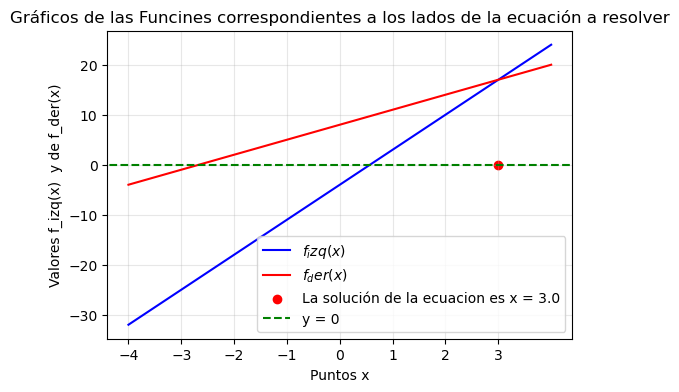

In [42]:
ecuacion_lineal.crear_graficos_f_izq_f_der()

In [38]:
ecuacion_lineal.crear_tabla_de_la_funcion_diferencia()

,numeros x,valores $y$ o $f(x)$
0,-4,-28
1,-3,-24
2,-2,-20
3,-1,-16
4,0,-12
5,1,-8
6,2,-4
7,3,0
8,4,4


La solucion es 3 

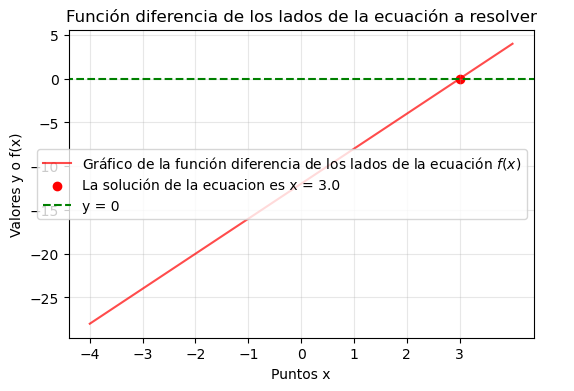

In [39]:
ecuacion_lineal.crear_grafico_funcion_diferencia(paso = 0.25)

# Práctica de solución de ecuaciones Cuadráticas

In [6]:
ecuacion_cuadratica = FuncionDiferenciaLadosEcuacion(f = lambda x:(x**2+2*x-3)-(0), a = -4, b =4 )

In [7]:
ecuacion_cuadratica.crear_tabla_de_la_funcion()

,numeros x,valores $y$ o $f(x)$
0,-4,5
1,-3,0
2,-2,-3
3,-1,-4
4,0,-3
5,1,0
6,2,5
7,3,12
8,4,21


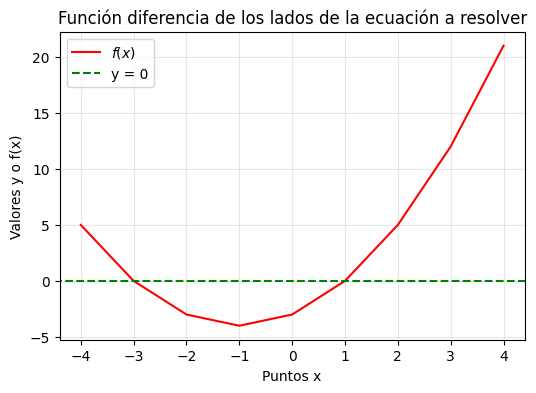

In [8]:
ecuacion_cuadratica.crear_grafico_funcion_diferencia()

# Practica de solución de ecuaciones con radicales 

In [9]:
ecuacion_con_radicales = FuncionDiferenciaLadosEcuacion(f = lambda x:(2*x)-(1-(2-x)**(1/2)), a = -2, b = 2 )

In [10]:
ecuacion_con_radicales.crear_tabla_de_la_funcion(paso = 0.25)

,numeros x,valores $y$ o $f(x)$
0,-2.00,-3.000000
1,-1.75,-2.563508
2,-1.50,-2.129171
3,-1.25,-1.697224
4,-1.00,-1.267949
5,-0.75,-0.841688
6,-0.50,-0.418861
7,-0.25,0.000000
8,0.00,0.414214
9,0.25,0.822876


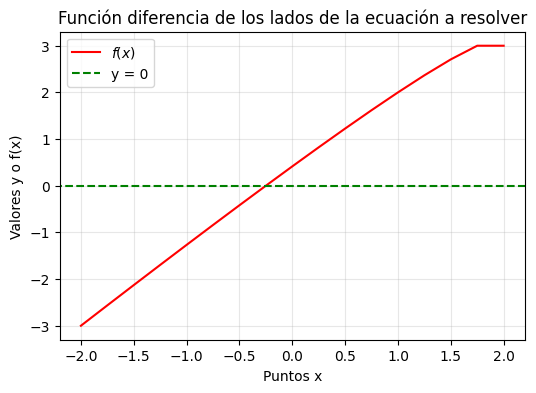

In [11]:
ecuacion_con_radicales.crear_grafico_funcion_diferencia(paso = 0.25)

## Conclusiones de la lectura de la tabla y el gráfico

# Ecuaciones polinómicas de grado 4

In [12]:
ecuacion_polinomica_grado_4 = FuncionDiferenciaLadosEcuacion(f = lambda x:(x**4 - 8*x**2 + 8)-(0), a = -3, b = 3)

In [13]:
ecuacion_polinomica_grado_4.crear_tabla_de_la_funcion(paso = 0.1)

,numeros x,valores $y$ o $f(x)$
0,-3.0,17.0000
1,-2.9,11.4481
2,-2.8,6.7456
3,-2.7,2.8241
4,-2.6,-0.3824
...,...,...
56,2.6,-0.3824
57,2.7,2.8241
58,2.8,6.7456
59,2.9,11.4481


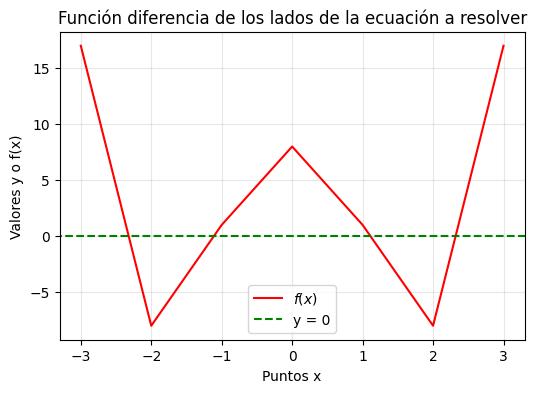

In [14]:
ecuacion_polinomica_grado_4.crear_grafico_funcion_diferencia()

# Práctica de solución de ecuaciones con potencias de exponentes fraccionarios 

In [14]:
ecuacion_con_potencias_fraccionarias = FuncionDiferenciaLadosEcuacion(f = lambda x:(x**(1/3) + x**(1/6) - 2)-(0), a =0 , b = 10)

In [ ]:
ecuacion_con_potencias_fraccionarias.crear_tabla_de_la_funcion()

In [ ]:
ecuacion_con_potencias_fraccionarias.crear_grafico_funcion_diferencia()

# Conclusión o interpretación del estudiante a partir de la lectura de la tabla y el gráfico 



# Práctica de solución de ecuaciones racionales

In [21]:
ecuacion_con_fracciones_algebraicas = FuncionDiferenciaLadosEcuacion(f = lambda x:(3/x - 2/(x-3))-(-12/(x**2-9)), a = -15 , b = -5)

In [ ]:
ecuacion_con_fracciones_algebraicas.crear_tabla_de_la_funcion()

In [ ]:
ecuacion_con_fracciones_algebraicas.crear_grafico_funcion_diferencia(paso = 0.5)

# Conclusión o interpretación del estudiante a partir de la lectura de la tabla y el gráfico 


# Práctica de solución de ecuaciones con valor absoluto  



In [19]:
ecuacion_con_valor_absoluto = FuncionDiferenciaLadosEcuacion(f = lambda x:(np.abs(2*x-5))-(3), a = -1 , b = 5)

In [20]:
ecuacion_con_valor_absoluto.crear_tabla_de_la_funcion()

,numeros x,valores $y$ o $f(x)$
0,-1,4
1,0,2
2,1,0
3,2,-2
4,3,-2
5,4,0
6,5,2


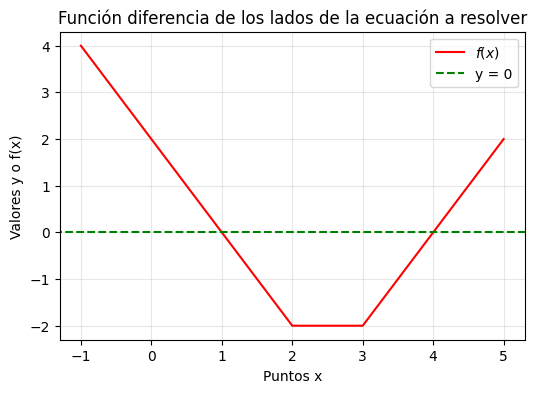

In [21]:
ecuacion_con_valor_absoluto.crear_grafico_funcion_diferencia()

# Referentes  

[1]  Gasco-Txabarri, J. (2017). La resolución de problemas aritmético-algebraicos y las estrategias de aprendizaje en matemáticas. Un estudio en educación secundaria obligatoria (ESO). *Revista Latinoamericana de Investigación en Matemática Educativa, 20*(2), 167-192. Recuperado de: https://www.redalyc.org/journal/335/33552356003/33552356003.pdf  

[2] A. V. Maldonado Rodríguez, "Estrategia didáctica basada en la caracterización de errores para desarrollar el pensamiento variacional en la solución de ecuaciones de primer grado con una incógnita en estudiantes de grado octavo de la Institución Educativa Santa Ana de San Sebastián de Mariquita," 2018. [Online]. Available: https://repository.ut.edu.co/server/api/core/bitstreams/81fe53d7-c581-4bd4-af6e-2b3a99e6e8c0/content


[3] Aguhayon, H., Tingson, R., & Pentang, J. (2023). Addressing students learning gaps in mathematics through differentiated instruction. International Journal of Educational Management and Development Studies, 4(1), 69-87. Available: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4390130

[4] Brousseau, G. (1986). Fundamentos y métodos de la Didáctica de la Matemática. Recherches en didactique des mathematiques, 7(2), 33-115.  

[5] Brousseau, G. (2007). Iniciación al estudio de la teoría de las situaciones didácticas/Introduction to study the theory of didactic situations: didáctico/didactic to algebra study (Vol. 7). Libros del Zorzal.  


[6] Guzman, M. (2002). *The Role of Visualization in the Teaching and Learning of Mathematical Analysis*. In A. Bishop et al. (Eds.), *Second International Handbook of Mathematics Education* (pp. 695-718). Springer.

[7] Barba, L. A., Barker, L. J., Blank, D. S., Brown, J., Downey, A. B., George, T., ... & Zingale, M. (2019). Teaching and learning with Jupyter. Recuperado: https://jupyter4edu. github. io/jupyter-edu-book, 1-77.

In [32]:
funcion = FuncionDiferenciaLadosEcuacion(f = lambda x :(x+9)-(25), a = 0, b = 20)

In [33]:
funcion.crear_tabla_de_la_funcion() 

,numeros x,valores $y$ o $f(x)$
0,0,-16
1,1,-15
2,2,-14
3,3,-13
4,4,-12
5,5,-11
6,6,-10
7,7,-9
8,8,-8
9,9,-7


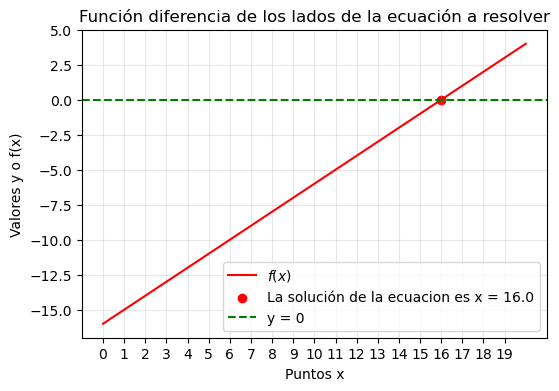

In [34]:
funcion.crear_grafico_funcion_diferencia()

# Métodologías de enseñanza del concepto de ecuaciones fruto de la implementación de esta investigación  

1. Método de observación o inspección de ecuaciones. 
2. Método de transposición de términos
3. Método de la balanza o de conservación del equilibrio o igualdad. 
4. Método de lectura de la tabla de la función diferencia de los lados.
5. Método de interpretación del gráfico de la función diferencia de los lados de la ecuación. 